In [1]:
import pandas as pd
import matplotlib.pylab as plt
from sklearn.cluster import KMeans
from sklearn import preprocessing

In [4]:
ds=pd.read_csv(r"C:\Users\arunf\OneDrive\Documents\Data Science\Machine Learning\DataSet\Star3642_balanced.csv")

In [5]:
ds

,Vmag,Plx,e_Plx,B-V,SpType,Amag,TargetClass
0,5.99,13.73,0.58,1.318,K5III,16.678352,0
1,8.70,2.31,1.29,-0.045,B1II,15.518060,0
2,5.77,5.50,1.03,0.855,G5III,14.471813,0
3,6.72,5.26,0.74,-0.015,B7V,15.324928,1
4,8.76,13.44,1.16,0.584,G0V,19.401997,1
...,...,...,...,...,...,...,...
3637,7.29,3.26,0.95,1.786,K4III,14.856089,0
3638,8.29,6.38,1.00,0.408,F2IV/V,17.314104,1
3639,6.11,2.42,0.79,1.664,M0/M1IIICNp,13.029078,0
3640,7.94,4.94,2.90,0.210,A5V,16.408636,1


In [6]:
le=preprocessing.LabelEncoder()

In [7]:
ds['SpType']=le.fit_transform(ds['SpType'].astype(str))

In [8]:
ds

,Vmag,Plx,e_Plx,B-V,SpType,Amag,TargetClass
0,5.99,13.73,0.58,1.318,522,16.678352,0
1,8.70,2.31,1.29,-0.045,99,15.518060,0
2,5.77,5.50,1.03,0.855,337,14.471813,0
3,6.72,5.26,0.74,-0.015,150,15.324928,1
4,8.76,13.44,1.16,0.584,293,19.401997,1
...,...,...,...,...,...,...,...
3637,7.29,3.26,0.95,1.786,515,14.856089,0
3638,8.29,6.38,1.00,0.408,208,17.314104,1
3639,6.11,2.42,0.79,1.664,539,13.029078,0
3640,7.94,4.94,2.90,0.210,53,16.408636,1


In [9]:
x=ds.iloc[:,:6]
x

,Vmag,Plx,e_Plx,B-V,SpType,Amag
0,5.99,13.73,0.58,1.318,522,16.678352
1,8.70,2.31,1.29,-0.045,99,15.518060
2,5.77,5.50,1.03,0.855,337,14.471813
3,6.72,5.26,0.74,-0.015,150,15.324928
4,8.76,13.44,1.16,0.584,293,19.401997
...,...,...,...,...,...,...
3637,7.29,3.26,0.95,1.786,515,14.856089
3638,8.29,6.38,1.00,0.408,208,17.314104
3639,6.11,2.42,0.79,1.664,539,13.029078
3640,7.94,4.94,2.90,0.210,53,16.408636


In [10]:
wcss=[]

In [11]:
for i in range(1,15):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=1)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

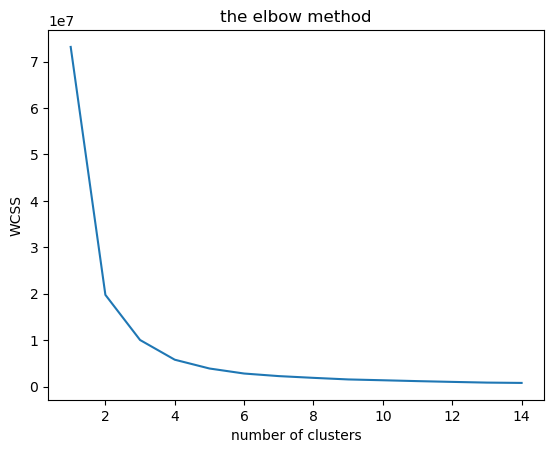

In [13]:
plt.plot(range(1,15),wcss)
plt.title("the elbow method")
plt.xlabel("number of clusters")
plt.ylabel("WCSS")
plt.show()

In [14]:
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=1)
y_kmeans=kmeans.fit_predict(x)

In [15]:
y_kmeans

array([1, 2, 0, ..., 1, 2, 1])

In [16]:
cluster_label=pd.Series(y_kmeans)

In [17]:
cluster_label

0       1
1       2
2       0
3       2
4       0
       ..
3637    1
3638    0
3639    1
3640    2
3641    1
Length: 3642, dtype: int32

In [18]:
ds['cluster']=cluster_label
ds=ds.iloc[:,[7,6,0,1,2,3,4,5]]
ds

,cluster,TargetClass,Vmag,Plx,e_Plx,B-V,SpType,Amag
0,1,0,5.99,13.73,0.58,1.318,522,16.678352
1,2,0,8.70,2.31,1.29,-0.045,99,15.518060
2,0,0,5.77,5.50,1.03,0.855,337,14.471813
3,2,1,6.72,5.26,0.74,-0.015,150,15.324928
4,0,1,8.76,13.44,1.16,0.584,293,19.401997
...,...,...,...,...,...,...,...,...
3637,1,0,7.29,3.26,0.95,1.786,515,14.856089
3638,0,1,8.29,6.38,1.00,0.408,208,17.314104
3639,1,0,6.11,2.42,0.79,1.664,539,13.029078
3640,2,1,7.94,4.94,2.90,0.210,53,16.408636


In [19]:
ds.groupby(ds.cluster).mean()

,TargetClass,Vmag,Plx,e_Plx,B-V,SpType,Amag
cluster,,,,,,,
0,0.902476,8.483571,9.686009,1.279407,0.535959,261.752438,17.767081
1,0.194343,7.975102,6.687051,1.124400,1.166827,460.737559,15.751431
2,0.617500,7.604750,5.061450,1.082825,0.175772,78.895000,15.188863
